In [1]:
! pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import os
data='C:\\Users\\ACER\\Downloads\\Mask data'
data

'C:\\Users\\ACER\\Downloads\\Mask data'

In [3]:
catagories=os.listdir(data)
labels=[i for i in range(len(catagories))]
label=dict(zip(catagories,labels))
print(label)
print(catagories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [ ]:
img_size=100
dataas=[]
target=[]
for catagory in catagories:
    folder_path=os.path.join(data,catagory)
    img_names=os.listdir(folder_path)
    for img_name in img_names :
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            dataas.append(resized)-
            target.append(label[catagory])
        except Exception as e:
            print('Exeception:',e)    

In [5]:
import numpy as np
dta=np.array(dataas)/255.0
print(dta.shape)

(1376, 100, 100)


In [6]:
dta=np.reshape(dta,(dta.shape[0],img_size,img_size,1))

In [7]:
target=np.array(target)
from keras.utils import to_categorical
new_target=to_categorical(target)
print(new_target)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [8]:
new_target
np.save('data',dta)
np.save('target',new_target)

In [9]:
import numpy as np
data=np.load('C:\\Users\\ACER\\.vscode\\data.npy')
target=np.load('C:\\Users\\ACER\\.vscode\\target.npy')
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
model=Sequential()
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0,5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categoical_crossentropy',optimizer='adam',metrics=['accuracy'])

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_target, epochs=20, callbacks=[checkpoint], validation_split=0.2)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 26s 763ms/step - accuracy: 0.5140 - loss: 2.0880 - val_accuracy: 0.6210 - val_loss: 0.6326
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 731ms/step - accuracy: 0.7980 - loss: 0.4991 - val_accuracy: 0.7702 - val_loss: 0.4897
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 801ms/step - accuracy: 0.8930 - loss: 0.2880 - val_accuracy: 0.8306 - val_loss: 0.3768
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 753ms/step - accuracy: 0.9586 - loss: 0.1635 - val_accuracy: 0.8629 - val_loss: 0.3442
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 716ms/step - accuracy: 0.9684 - loss: 0.1057 - val_accuracy: 0.8589 - val_loss: 0.3610
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 819ms/step - accuracy: 0.9828 - loss: 0.0636 - val_accuracy: 0.8831 - val_loss: 0.3400
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 778ms/step - accuracy: 0.9965 - loss: 0.0381 - val_accuracy: 0.8669 - val_loss: 0.3825
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 762ms/step - accuracy: 0.9932 - loss: 0.0366 - val_accu

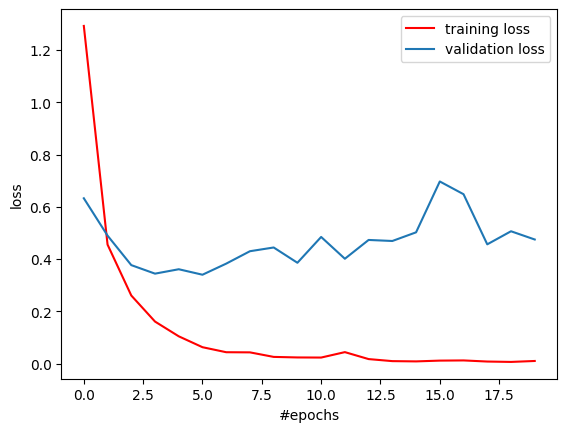

In [11]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


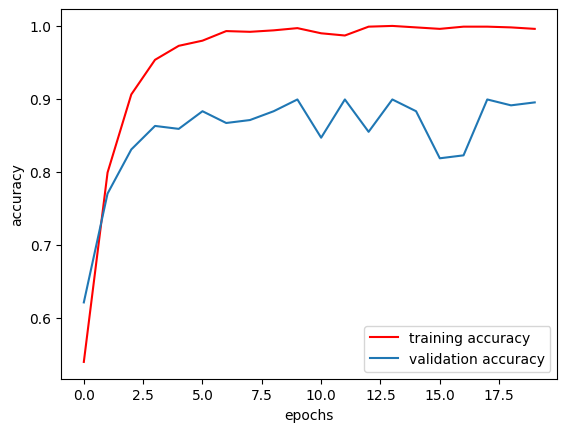

In [12]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [13]:
model.save('facedetector.h5')

In [26]:
from keras.models import load_model
import cv2
import numpy as np
model=load_model('facedetector.h5')
face_clsfr = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')



In [ ]:
source=cv2.VideoCapture(0)
label_dict={0:'without mask',1:'with mask'}
color_dict={0:(0,0,255),1:(0,255,0)}
while(True):
    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5) 
    for (x,y,w,h) in faces:
      face_img=gray[y:y+w,x:x+h]
      resized=cv2.resize(face_img,(100,100))
      normialized=resized/255.0
      reshaped=np.reshape(normialized,(1,100,100,1))
      result=model.predict(reshaped)
      label=np.argmax(result,axis=1)[0]
      cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
      cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
      cv2.putText(img,label_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
      cv2.imshow('Mask_detection',img) 
      key=cv2.waitKey(1)
      if key==27:
          break

cv.destroyAllWindows()      
source.release() 
      


      

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━